<a href="https://colab.research.google.com/github/smjimenez97/sumativa/blob/master/Sumativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("./almuerzos.csv")

In [3]:
data.shape

(215, 12)

In [4]:
data.head()

,fecha,temporada,dia-descanso,cercano-dia-celebracion,luego-feriado,cantidad,fecha.year,fecha.month,fecha.day-of-month,fecha.day-of-week,fecha.hour,fecha.minute
0,07/08/18 00:00,1,0,0,0,29,18,7,8,7,0,0
1,08/08/18 00:00,1,0,0,0,31,18,8,8,3,0,0
2,10/08/18 00:00,1,1,0,0,25,18,10,8,1,0,0
3,16/08/18 00:00,1,0,0,0,61,18,8,16,4,0,0
4,17/08/18 00:00,1,0,0,0,43,18,8,17,5,0,0


In [5]:
data.describe()

,temporada,dia-descanso,cercano-dia-celebracion,luego-feriado,cantidad,fecha.year,fecha.month,fecha.day-of-month,fecha.day-of-week,fecha.hour,fecha.minute
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.0,215.0
mean,0.576744,0.032558,0.023256,0.037209,36.032558,18.427907,6.795349,15.967442,3.720930,0.0,0.0
std,0.495228,0.177891,0.151067,0.189716,11.462000,0.495930,3.831129,8.776767,1.883593,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,13.000000,18.000000,1.000000,1.000000,1.000000,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,29.000000,18.000000,3.000000,10.000000,2.000000,0.0,0.0
50%,1.000000,0.000000,0.000000,0.000000,35.000000,18.000000,8.000000,16.000000,4.000000,0.0,0.0
75%,1.000000,0.000000,0.000000,0.000000,42.000000,19.000000,10.000000,23.000000,5.000000,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,70.000000,19.000000,12.000000,31.000000,7.000000,0.0,0.0


<ipython-input-24-b9515741e04a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(['temporada','luego-feriado', 'cantidad'],1).hist()


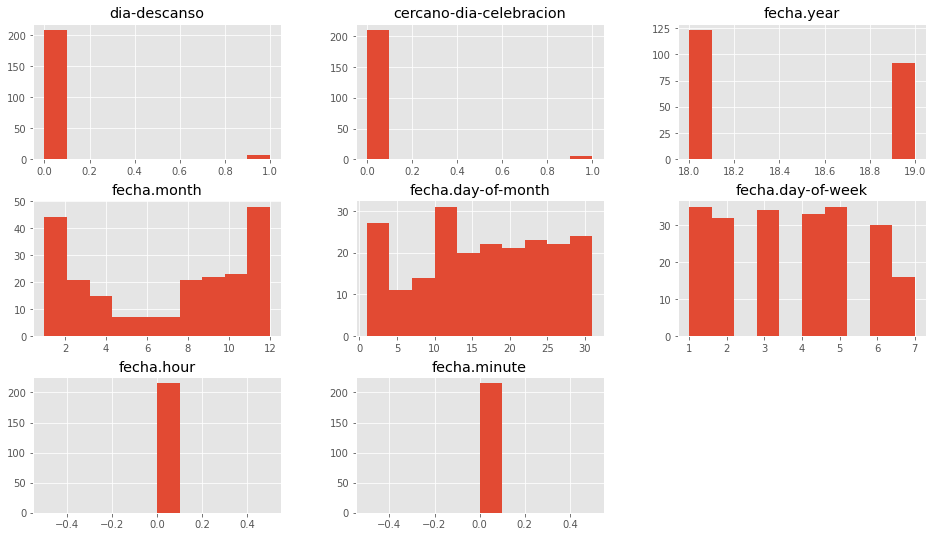

In [24]:
data.drop(['temporada','luego-feriado', 'cantidad'],1).hist()
plt.show()

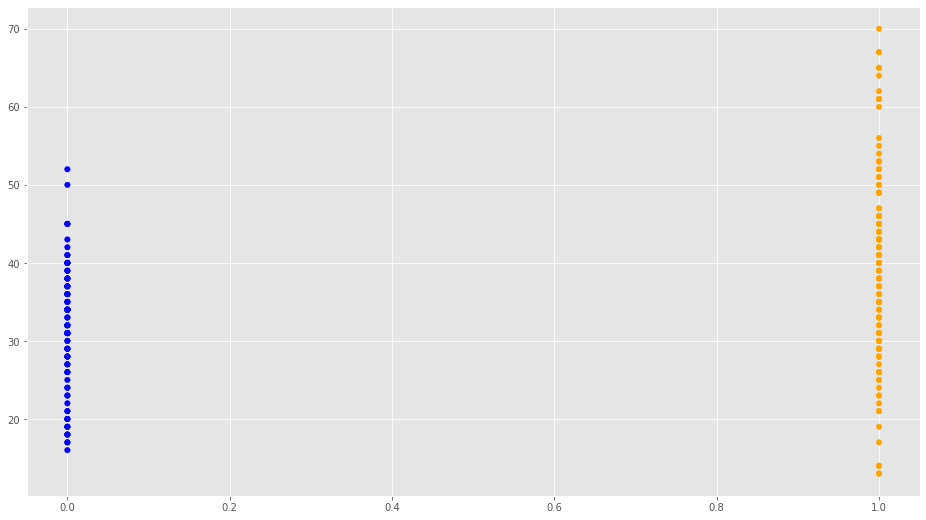

In [42]:
colores=['orange','blue']
tamanios=[30,60]

f1 = data['temporada'].values
f2 = data['cantidad'].values


asignar=[]
for index, row in data.iterrows():
    if(row['temporada']>0.57):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2,  c=asignar, s=tamanios[0])
plt.show()

In [15]:
filtered_data = data[(data['temporada'] <= 1) & (data['cantidad'] <= 55)]

f1 = filtered_data['temporada'].values
f2 = filtered_data['cantidad'].values

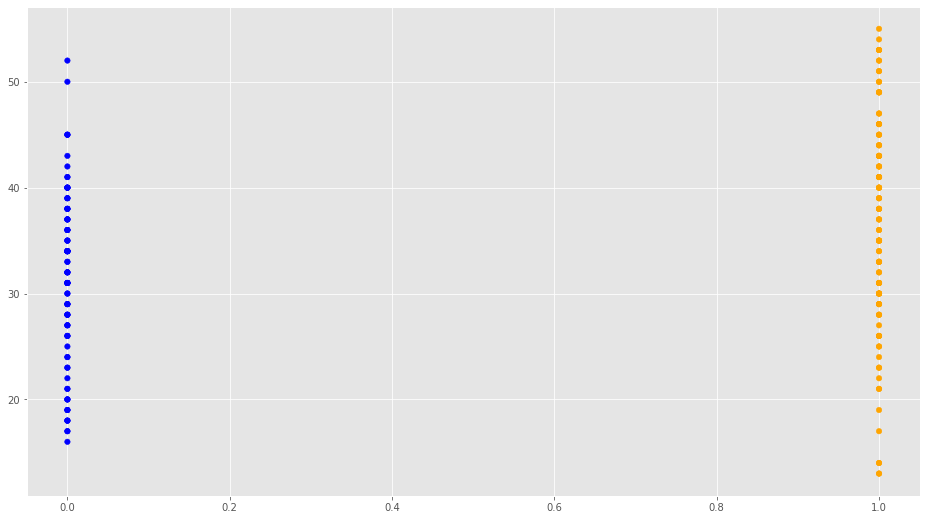

In [16]:
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['temporada']>0.57):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [17]:
filtered_data.describe()

,temporada,dia-descanso,cercano-dia-celebracion,luego-feriado,cantidad,fecha.year,fecha.month,fecha.day-of-month,fecha.day-of-week,fecha.hour,fecha.minute
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.0,202.0
mean,0.549505,0.029703,0.024752,0.039604,34.292079,18.450495,6.712871,15.831683,3.688119,0.0,0.0
std,0.498779,0.170188,0.155756,0.195511,9.418350,0.498779,3.911551,8.853219,1.910109,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,13.000000,18.000000,1.000000,1.000000,1.000000,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,28.000000,18.000000,3.000000,10.000000,2.000000,0.0,0.0
50%,1.000000,0.000000,0.000000,0.000000,34.000000,18.000000,8.000000,16.000000,4.000000,0.0,0.0
75%,1.000000,0.000000,0.000000,0.000000,41.000000,19.000000,10.000000,23.000000,5.000000,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,55.000000,19.000000,12.000000,31.000000,7.000000,0.0,0.0


In [18]:
dataX =filtered_data[["temporada"]]
X_train = np.array(dataX)
y_train = filtered_data['cantidad'].values

In [19]:
regr = linear_model.LinearRegression()

In [20]:
regr.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = regr.predict(X_train)

In [22]:
print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [4.97109197]
Independent term: 
 31.560439560439562
Mean squared error: 82.15
Variance score: 0.07


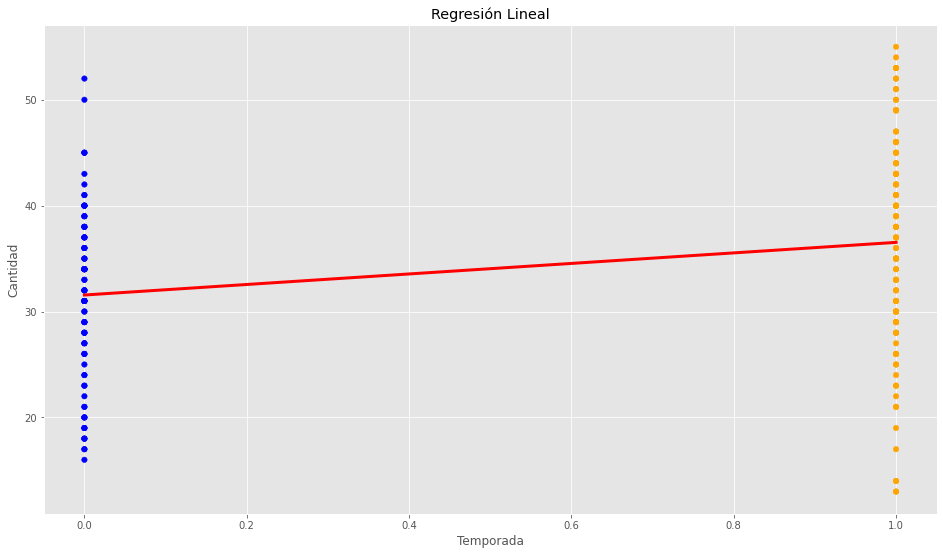

In [23]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Temporada')
plt.ylabel('Cantidad')
plt.title('Regresión Lineal')

plt.show()

In [76]:
suma = (filtered_data["temporada"] + filtered_data['cantidad'].fillna(0) + filtered_data['luego-feriado'])

dataX2 =  pd.DataFrame()
dataX2["fecha.year"] = filtered_data["fecha.year"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['fecha.month'].values

In [77]:
regr2 = linear_model.LinearRegression()

regr2.fit(XY_train, z_train)

z_pred = regr2.predict(XY_train)

print('Coefficients: \n', regr2.coef_)
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [-4.78995273e+00 -2.18004010e-03]
Mean squared error: 9.58
Variance score: 0.37


Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

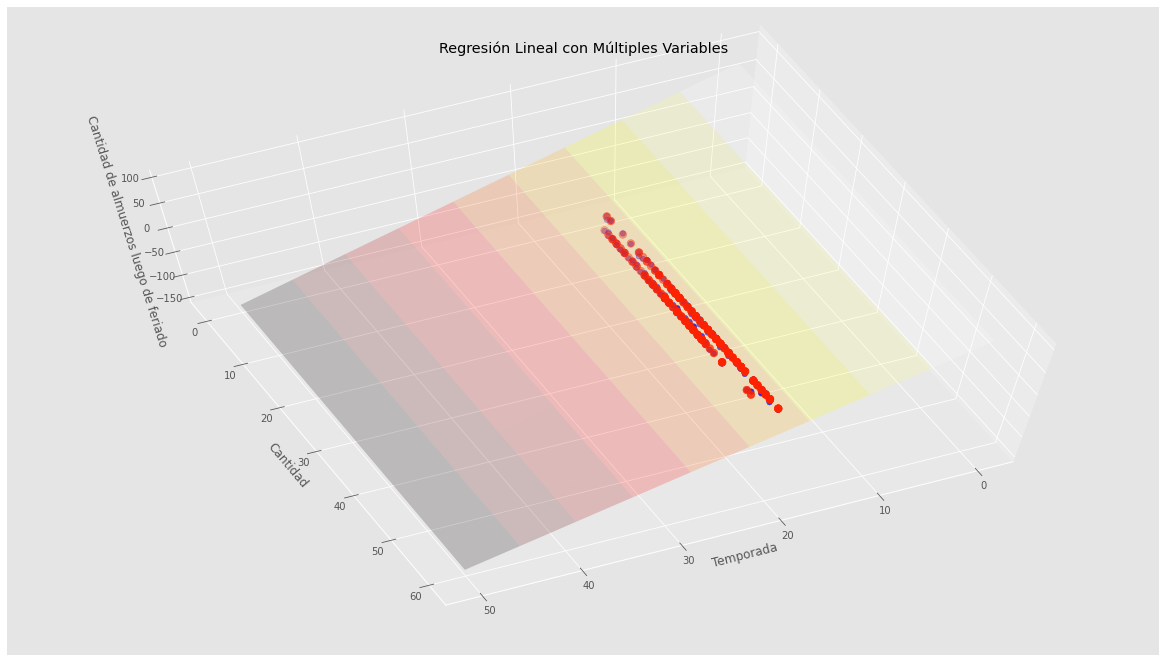

In [89]:
fig = plt.figure()
ax = Axes3D(fig)

xx, yy = np.meshgrid(np.linspace(0, 50, num=10), np.linspace(0, 60, num=10))

nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 

z = (nuevoX + nuevoY + regr2.intercept_)

ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)
 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=60)

ax.view_init(elev=70., azim=65)
        
ax.set_xlabel('Temporada')
ax.set_ylabel('Cantidad')
ax.set_zlabel('Cantidad de almuerzos luego de feriado')
ax.set_title('Regresión Lineal con Múltiples Variables')